# Final Training Analysis of CartPole-v0

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Average Case

In [9]:
from monitor.eval_agent import running_avg, get_confidence_interval

In [10]:
reward_dtnet = [] # 005, 11 internal nodes
reward_fcnn = []  # fcnn with 2 hidden layers of 64 nodes each
reward_prolo = [] # deep prolonet with 11 internal nodes
reward_dgt = []   # dgt with 11 internal nodes
reward_icct = []  # icct with 11 internal nodes

seeds = [62, 65, 100, 104, 112]

num_seeds = 5
for i in range(num_seeds):
    # DTNet initialized 14 nodes logs/cart_cpu/dtnet/aaai_15n_16x16c_rand
    reward_dtnet.append(
        np.loadtxt(
            f'../../logs/cart_cpu/dtnet/aaai_15n_16x16c_rand/seed{seeds[i]}_rewards.txt'
        )[:1400])

    # FCNN logs/cart_cpu/fcnn/aaai_16x16a_16x16c_rand
    reward_fcnn.append(
        np.loadtxt(
            f'../../logs/cart_cpu/fcnn/aaai_16x16a_16x16c_rand/seed{seeds[i]}_rewards.txt'
        )[:1400])

    # Prolo logs/cart_cpu/icct/aaai_15na_soft_16x16c_rand
    reward_prolo.append(
        np.loadtxt(
            f'../../logs/cart_cpu/icct/aaai_15na_soft_16x16c_rand/seed{seeds[i]}_rewards.txt'
        )[:1400])

    # DGT logs/cart_cpu/dgt/aaai_15n_16x16c_rand
    reward_dgt.append(
        np.loadtxt(f'../../logs/cart_cpu/dgt/aaai_15n_16x16c_rand/seed{seeds[i]}_rewards.txt')[:1400])

    # ICCT logs/cart_cpu/icct/aaai_15n_16x16c_rand
    reward_icct.append(
        np.loadtxt(f'../../logs/cart_cpu/icct/aaai_15n_16x16c_rand/seed{seeds[i]}_rewards.txt')[:1400])


reward_dtnet = np.array(reward_dtnet)
reward_fcnn = np.array(reward_fcnn)
reward_prolo = np.array(reward_prolo)
reward_dgt = np.array(reward_dgt)
reward_icct = np.array(reward_icct)
print('Num of Seeds:', num_seeds)

Num of Seeds: 5


### running average

In [12]:
avg_dtnet = running_avg(reward_dtnet, num_seeds)
avg_prolo = running_avg(reward_prolo, num_seeds)
avg_fcnn = running_avg(reward_fcnn, num_seeds=num_seeds)
avg_dgt = running_avg(reward_dgt, num_seeds=num_seeds)
avg_icct = running_avg(reward_icct, num_seeds=num_seeds)

In [13]:
mean_dtnet, cil_dtnet, cih_dtnet = get_confidence_interval(avg_dtnet)

mean_prolo, cil_prolo, cih_prolo = get_confidence_interval(avg_prolo)

mean_fcnn, cil_fcnn, cih_fcnn = get_confidence_interval(avg_fcnn)
mean_dgt, cil_dgt, cih_dgt = get_confidence_interval(avg_dgt)
mean_icct, cil_icct, cih_icct = get_confidence_interval(avg_icct)

## Plot for Lunar Lander

In [14]:
labels = ['DTSemNet', 'FCNN', 'ProLoNet', 'DGT', 'ICCT']
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple']

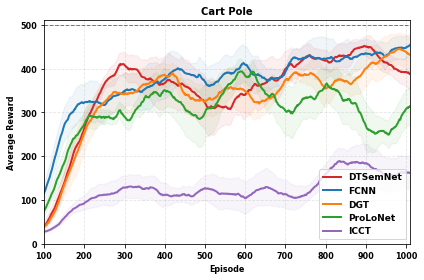

In [15]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the data
# dtnet
alpha = 0.07


alpha = 0.07

# dtnet14 rand
ax.plot(np.arange(len(mean_dtnet)),
        mean_dtnet,
        color=colors[0],
        linewidth=2,
        label=labels[0])
ax.fill_between(np.arange(len(mean_dtnet)),
                cil_dtnet,
                cih_dtnet,
                color=colors[0],
                alpha=alpha)

# fcnn
ax.plot(np.arange(len(mean_fcnn)),
        mean_fcnn,
        color=colors[1],
        linewidth=2,
        label=labels[1])
ax.fill_between(np.arange(len(mean_fcnn)),
                cil_fcnn,
                cih_fcnn,
                color=colors[1],
                alpha=alpha)

# DGT
ax.plot(np.arange(len(mean_dgt)),
        mean_dgt,
        color=colors[3],
        linewidth=2,
        label=labels[3])
ax.fill_between(np.arange(len(mean_dgt)),
                cil_dgt,
                cih_dgt,
                color=colors[3],
                alpha=alpha)

# prolo
ax.plot(np.arange(len(mean_prolo)),
        mean_prolo,
        color=colors[2],
        linewidth=2,
        label=labels[2])
ax.fill_between(np.arange(len(mean_prolo)),
                cil_prolo,
                cih_prolo,
                color=colors[2],
                alpha=alpha)

# ICCT
ax.plot(np.arange(len(mean_icct)),
        mean_icct,
        color=colors[4],
        linewidth=2,
        label=labels[4])
ax.fill_between(np.arange(len(mean_icct)),
                cil_icct,
                cih_icct,
                color=colors[4],
                alpha=alpha)




# ax.axhline(y=0, color='black', linewidth=1, linestyle='--', alpha=0.5)
# ax.axhline(y=80, color='black', linewidth=1, linestyle='--', alpha=0.5)
ax.axhline(y=500, color='black', linewidth=1, linestyle='--', alpha=0.5)
# Add axis labels and title
ax.set_xlabel('Episode', fontsize=8, fontweight='bold')
ax.set_ylabel('Average Reward', fontsize=8, fontweight='bold')
ax.set_title('Cart Pole', fontsize=10, fontweight='bold')

# Add legend and grid
ax.legend(loc='lower right',
          prop={'weight': 'bold', 'size': 9})
ax.grid(True, which='major', linestyle='--', color='gray', alpha=0.2)

# Customize tick parameters
plt.yticks(np.arange(0, 510, 100))
plt.xticks(np.arange(100, 1010, 100))
ax.set_ylim([0, 510])
ax.set_xlim([100, 1010])
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)
# ax.minorticks_on()

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontweight('bold')

# Adjust the layout to make it look clean
fig.tight_layout()

# Save the figure as a PDF
fig.savefig('../../results/aaai_plots/cart.png', bbox_inches='tight', dpi=300)
